In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
data = pd.read_csv('data/data.csv')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Machine Learning
We used a list of machine learning models to predict the decision by both the participant and his or her partner. The first section includes separating data into the training data and testing data. The following machine learning techniques are used:

- **linear_model**
- **Decision Tree**
- **SVC**
- **Random Forest**
- **AdaBoost**
- **K-Nearest Neighbor**
- **Neural Network Model**



In [4]:
race_features = ['race', 'race_o', 'dec', 'dec_o']
race_data = data[race_features]
race_data['race']

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
5       4.0
6       4.0
7       4.0
8       4.0
9       4.0
10      2.0
11      2.0
12      2.0
13      2.0
14      2.0
15      2.0
16      2.0
17      2.0
18      2.0
19      2.0
20      2.0
21      2.0
22      2.0
23      2.0
24      2.0
25      2.0
26      2.0
27      2.0
28      2.0
29      2.0
       ... 
8348    1.0
8349    1.0
8350    1.0
8351    1.0
8352    1.0
8353    1.0
8354    1.0
8355    1.0
8356    2.0
8357    2.0
8358    2.0
8359    2.0
8360    2.0
8361    2.0
8362    2.0
8363    2.0
8364    2.0
8365    2.0
8366    2.0
8367    2.0
8368    2.0
8369    2.0
8370    2.0
8371    2.0
8372    2.0
8373    2.0
8374    2.0
8375    2.0
8376    2.0
8377    2.0
Name: race, Length: 8378, dtype: float64

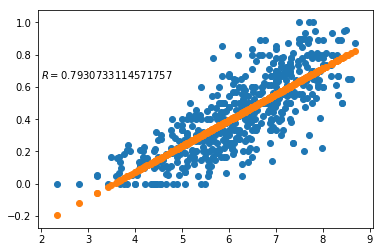

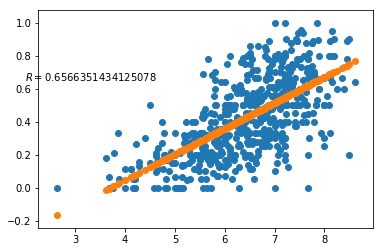

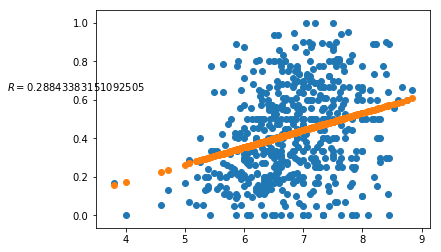

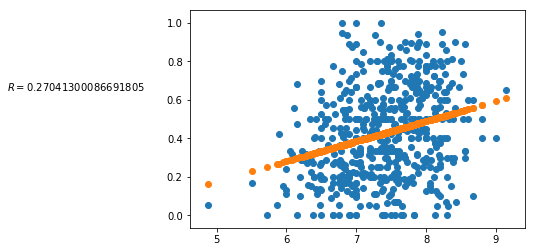

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
def linreg(col):
    mean_attr = data.groupby('pid')[col].mean()
    dec_attr = data.groupby('pid')['dec'].mean()
    lm = linear_model.LinearRegression()
    lm = lm.fit(mean_attr.reshape(-1,1), dec_attr.reshape(-1, 1))
    pred = lm.predict(mean_attr.reshape(-1, 1))
    plt.scatter(mean_attr, dec_attr)
    plt.scatter(mean_attr, pred)
    plt.text(2, 0.65, '$R = $' + str(math.sqrt(lm.score(mean_attr.reshape(-1, 1), dec_attr.reshape(-1, 1)))))
    plt.show()

linreg('attr')
linreg('fun')
linreg('amb')
linreg('intel')

In [6]:
feature_list = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
data['ovr'] = [0]*len(data)
for col in feature_list:
    data['ovr'] += data['ovr'] + (data[col] * data[col + "1_1"]) 
for col in data.columns:
    if '1_1' in col:
        feature_list.append(col)
    
feature_list.extend(['dec', 'age', 'age_o', 'samerace'])

In [7]:
def removeComa(lst):
    l = []
    for i in lst:
        fl = ""
        for c in i:
            if ((c == '.') | c.isdigit()):
                fl += c
        l.append(float(fl))
    return l

features = data[feature_list][data['gender'] == 1].dropna()
features = features.dropna()
target = features['dec']
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = \
train_test_split(features.drop('dec', axis = 1), target, test_size = 0.1)

In [29]:
accuracy_result = []
model = []
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split = 100)
clf_fit = clf.fit(features_train, target_train)
pred = clf_fit.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred, target_test)
accuracy_result.append(accuracy_score(pred, target_test))
model.append("DecisionTree")

In [30]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C=1)
clf = clf.fit(features_train, target_train)
pred= clf.predict(features_test)
accuracy_score(pred, target_test)
accuracy_result.append(accuracy_score(pred, target_test)) 
model.append("SVC")

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10000)
clf = clf.fit(features_train, target_train)
pred= clf.predict(features_test)
accuracy_score(pred, target_test)
accuracy_result.append(accuracy_score(pred, target_test))
model.append("RandomForest")

In [32]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 1000)
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_test)
accuracy_score(pred, target_test)
accuracy_result.append(accuracy_score(pred, target_test))
model.append("AdaBoost")

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_test)
accuracy_score(pred, target_test)
accuracy_result.append(accuracy_score(pred, target_test))
model.append("KNeighbors")

In [34]:
clf.predict([[8, 3,5,8,1,4, 20, 0, 5, 5, 70, 0, 20, 20, 1]])

array([1])

In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1000, 1000))
clf = clf.fit(features_train, target_train)
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
accuracy_score(pred, target_test)
accuracy_result.append(accuracy_score(pred, target_test))
model.append("MLP")

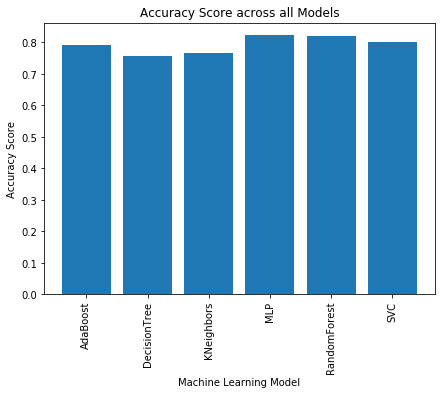

In [44]:
#by_position = by_player[['position', 'redCards']].groupby('position').aggregate('sum')
plt.figure(figsize=(7,5))
plt.bar(model,accuracy_result)
plt.xticks(rotation=90)
plt.title('Accuracy Score across all Models')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy Score')
plt.show()